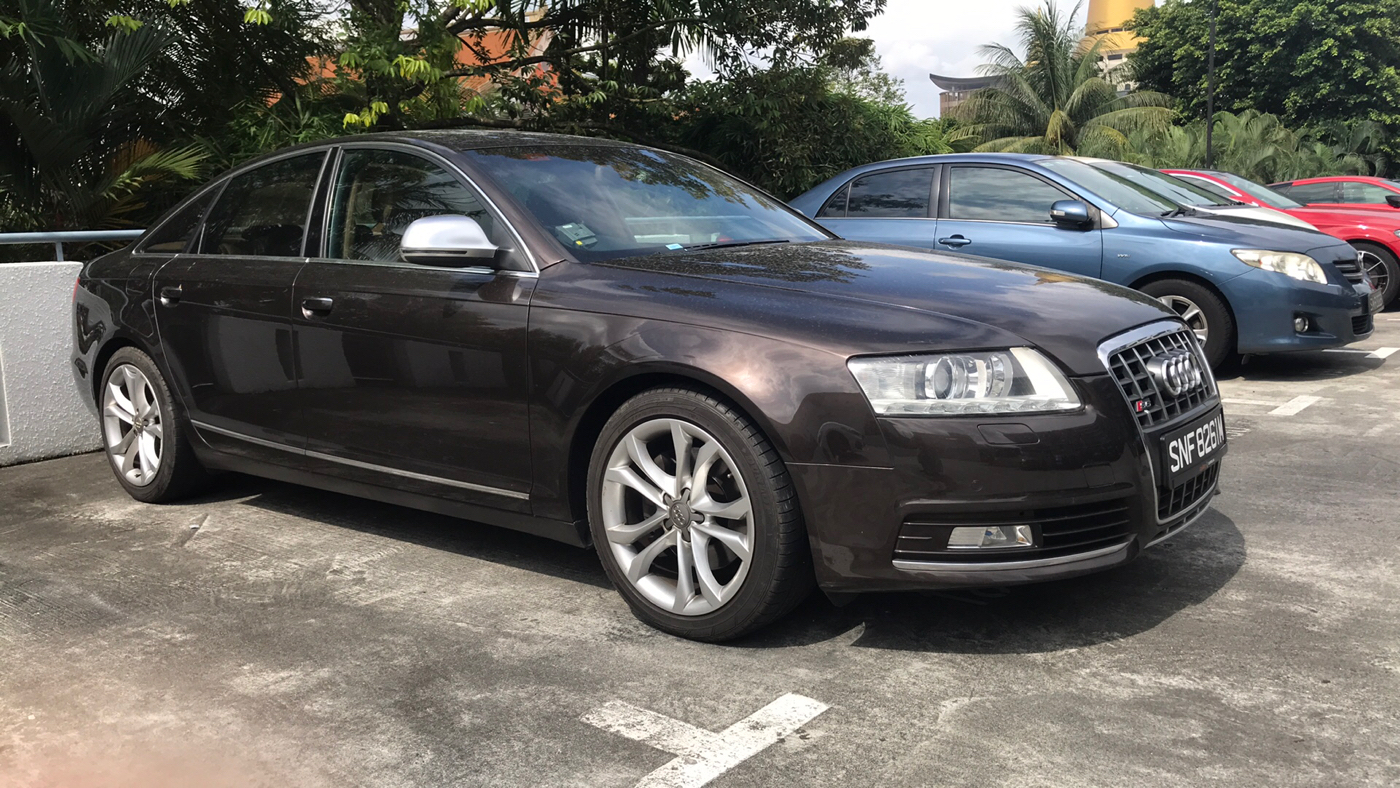

In [41]:
from PIL import Image
import cv2
import numpy as np

base_image = Image.open("/home/ubuntu/Users/maixueqiao/carro-ds-cv-inspection/car_detector/tests/test.jpg")
mask_image = Image.open("/home/ubuntu/Users/maixueqiao/carro-ds-cv-inspection/car_detector/inverted_mask.jpg")

display(base_image)


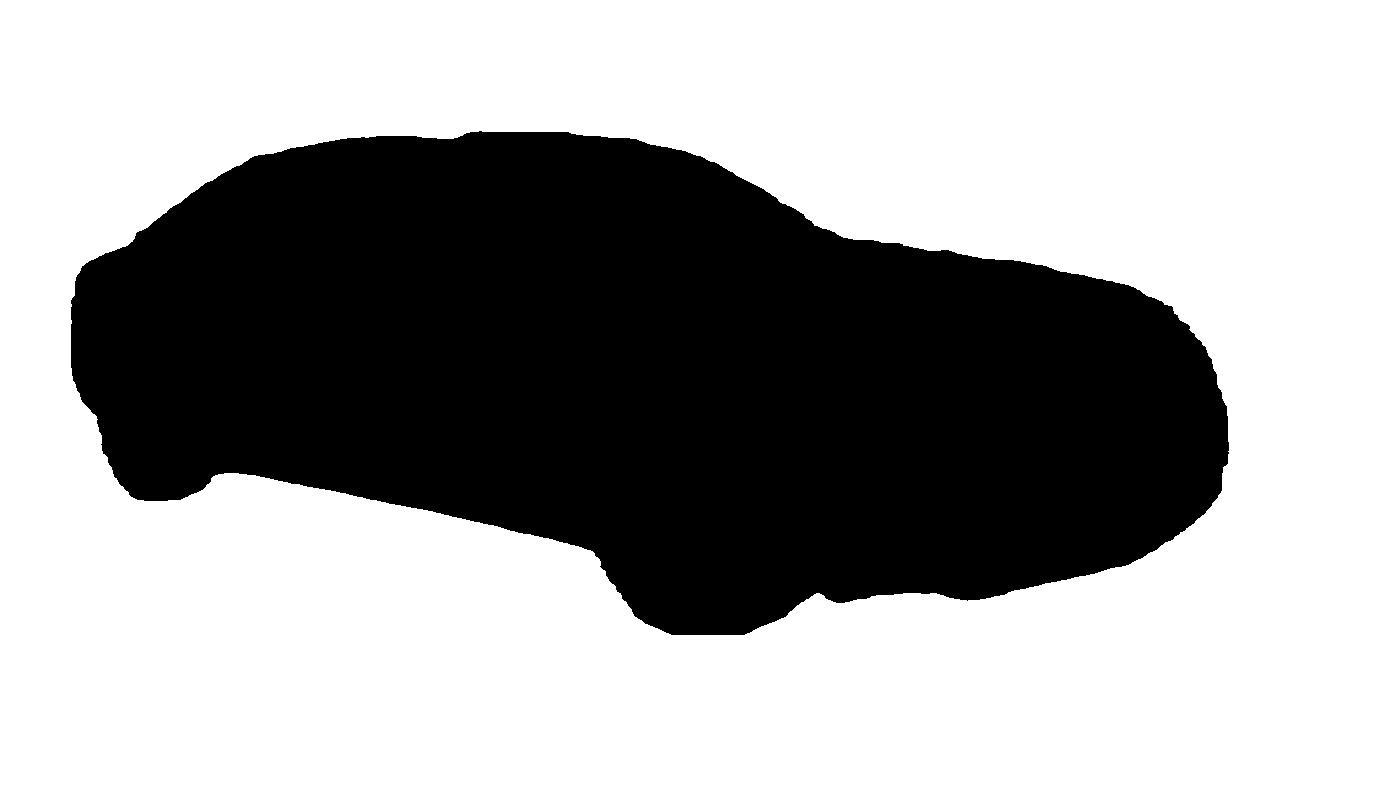

In [42]:
display(mask_image)

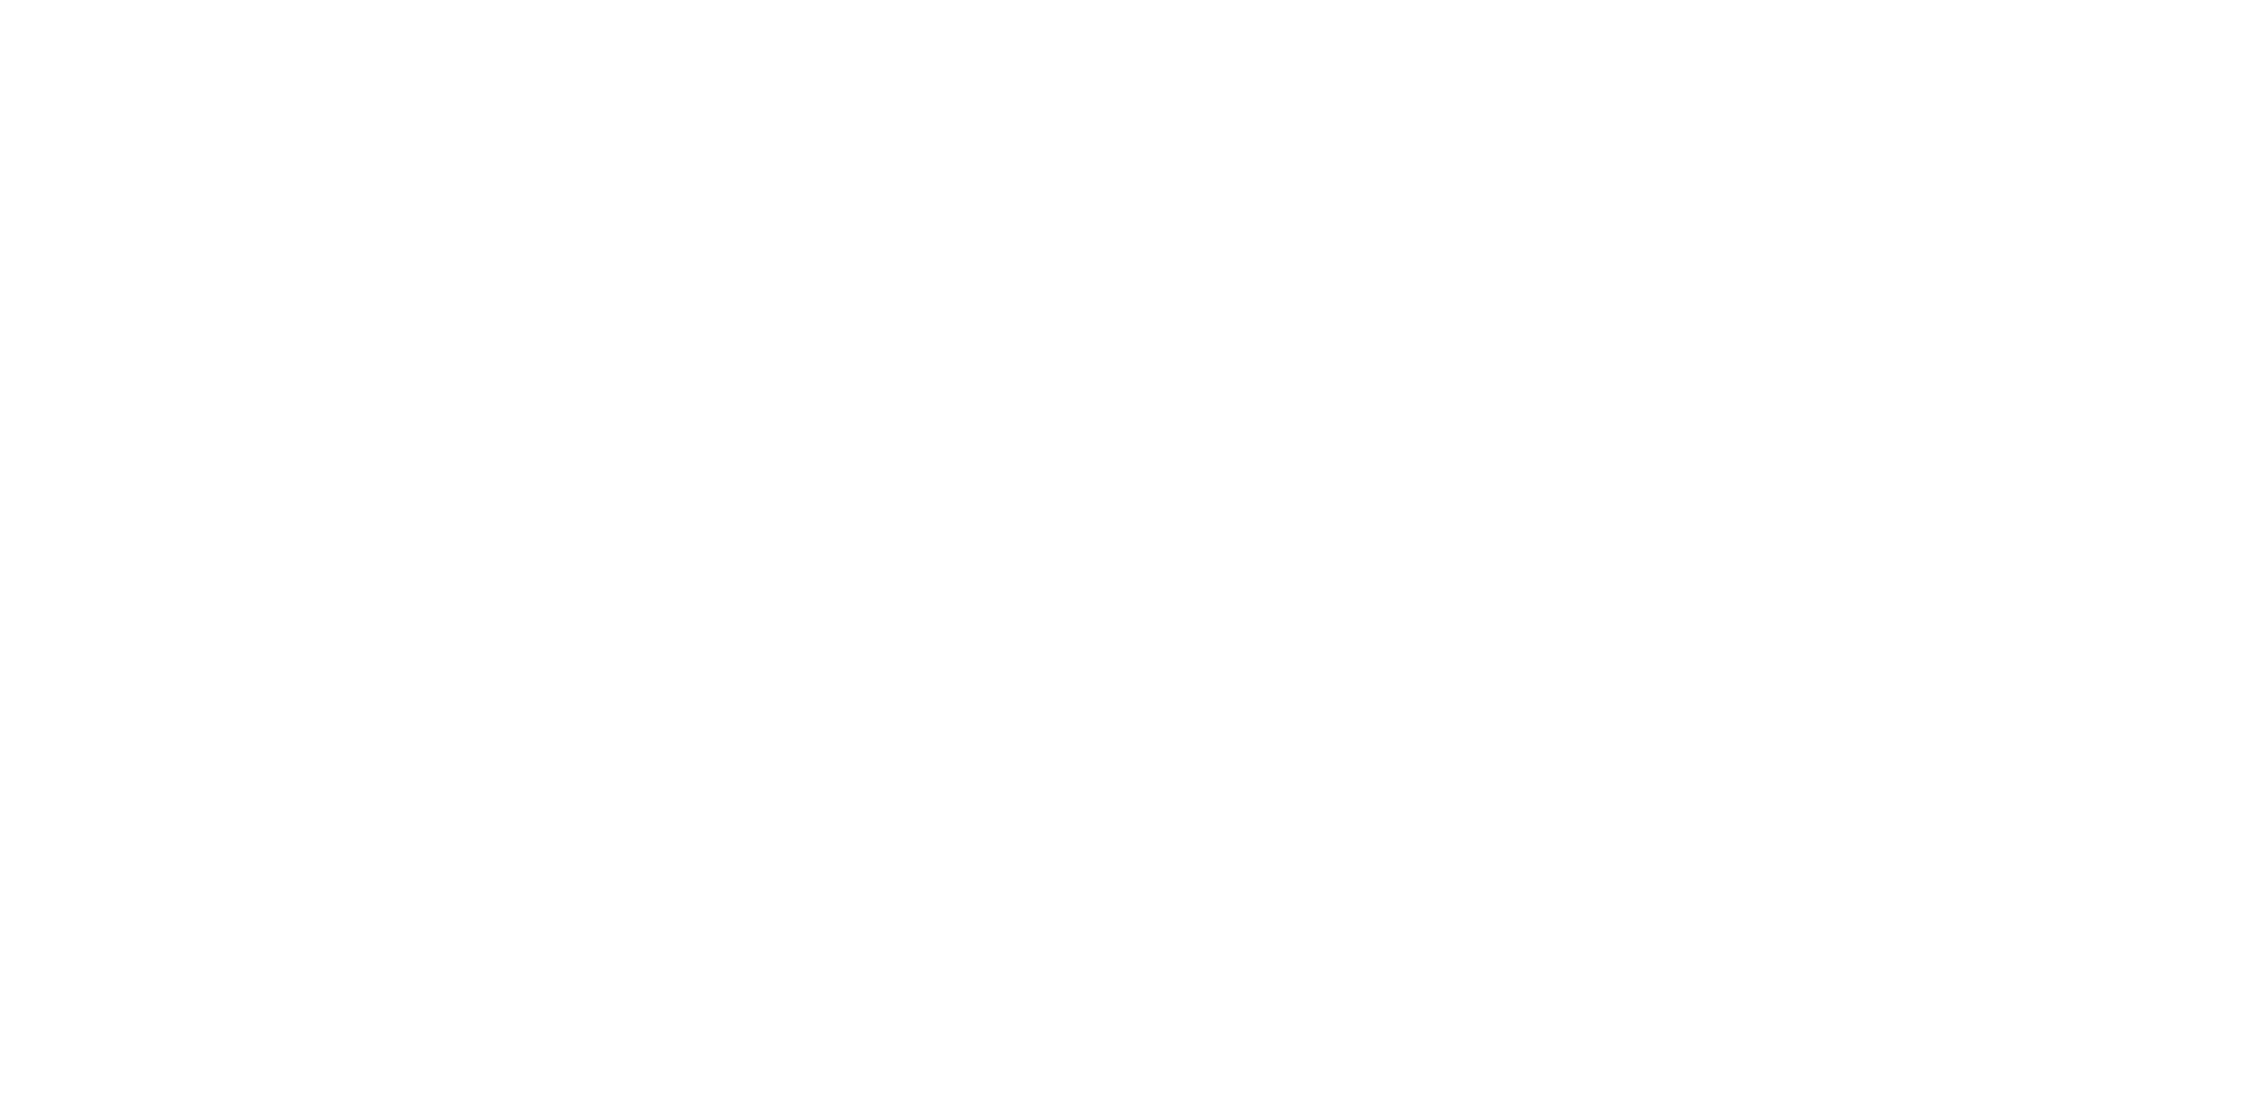

In [221]:
# read the input image
# img = cv2.imread("/home/ubuntu/Users/maixueqiao/image_processing/mercedes-benz-cla-class-cla45-amg-4matic-shooting-brake-GV9477-carro-015.png")
img_pil = Image.open("/home/ubuntu/Users/maixueqiao/image_processing/mercedes-benz-cla-class-cla45-amg-4matic-shooting-brake-GV9477-carro-015.png")
img_pil = img_pil.convert('L')

contours, _ = cv2.findContours(np.array(img_pil).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

im = np.array(img_pil)
for contour in contours:
    convexHull = cv2.convexHull(contour)
    cv2.drawContours(im, [convexHull], -1, (255, 255, 255), thickness=cv2.FILLED)

display(Image.fromarray(im))
# Image.fromarray(inv).save('img1.png')

In [735]:
import cv2
from PIL import Image
from shapely.geometry import Polygon

# read the input image
# img = cv2.imread("/home/ubuntu/Users/maixueqiao/carro-ds-cv-inspection/car_detector/mask.jpg")
im_path = 'audi-a3-sedan-1.0a-tfsi-s-tronic-DRQ8W3-carro-008_mask.png'
img = cv2.imread('/home/ubuntu/Users/maixueqiao/image_processing/'+im_path)

# img = cv2.bitwise_not(img)

# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding on the gray image to create a binary image
ret,thresh = cv2.threshold(gray,127,255,0)

# find the contours
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# take the first contour
cnt = max(contours, key = cv2.contourArea)

# compute the bounding rectangle of the contour
x,y,w,h = cv2.boundingRect(cnt)

# draw contour
img = cv2.drawContours(img,[cnt],0,(0,255,255),2)

# draw the bounding rectangle
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)


In [736]:
bbox = [(x,y),(x,y+h),(x+w, y), (x+w,y+h)]
bbox

[(378, 482), (378, 1657), (2458, 482), (2458, 1657)]

In [737]:
bboxx, bboxy = zip(*bbox)
bboxx

(378, 378, 2458, 2458)

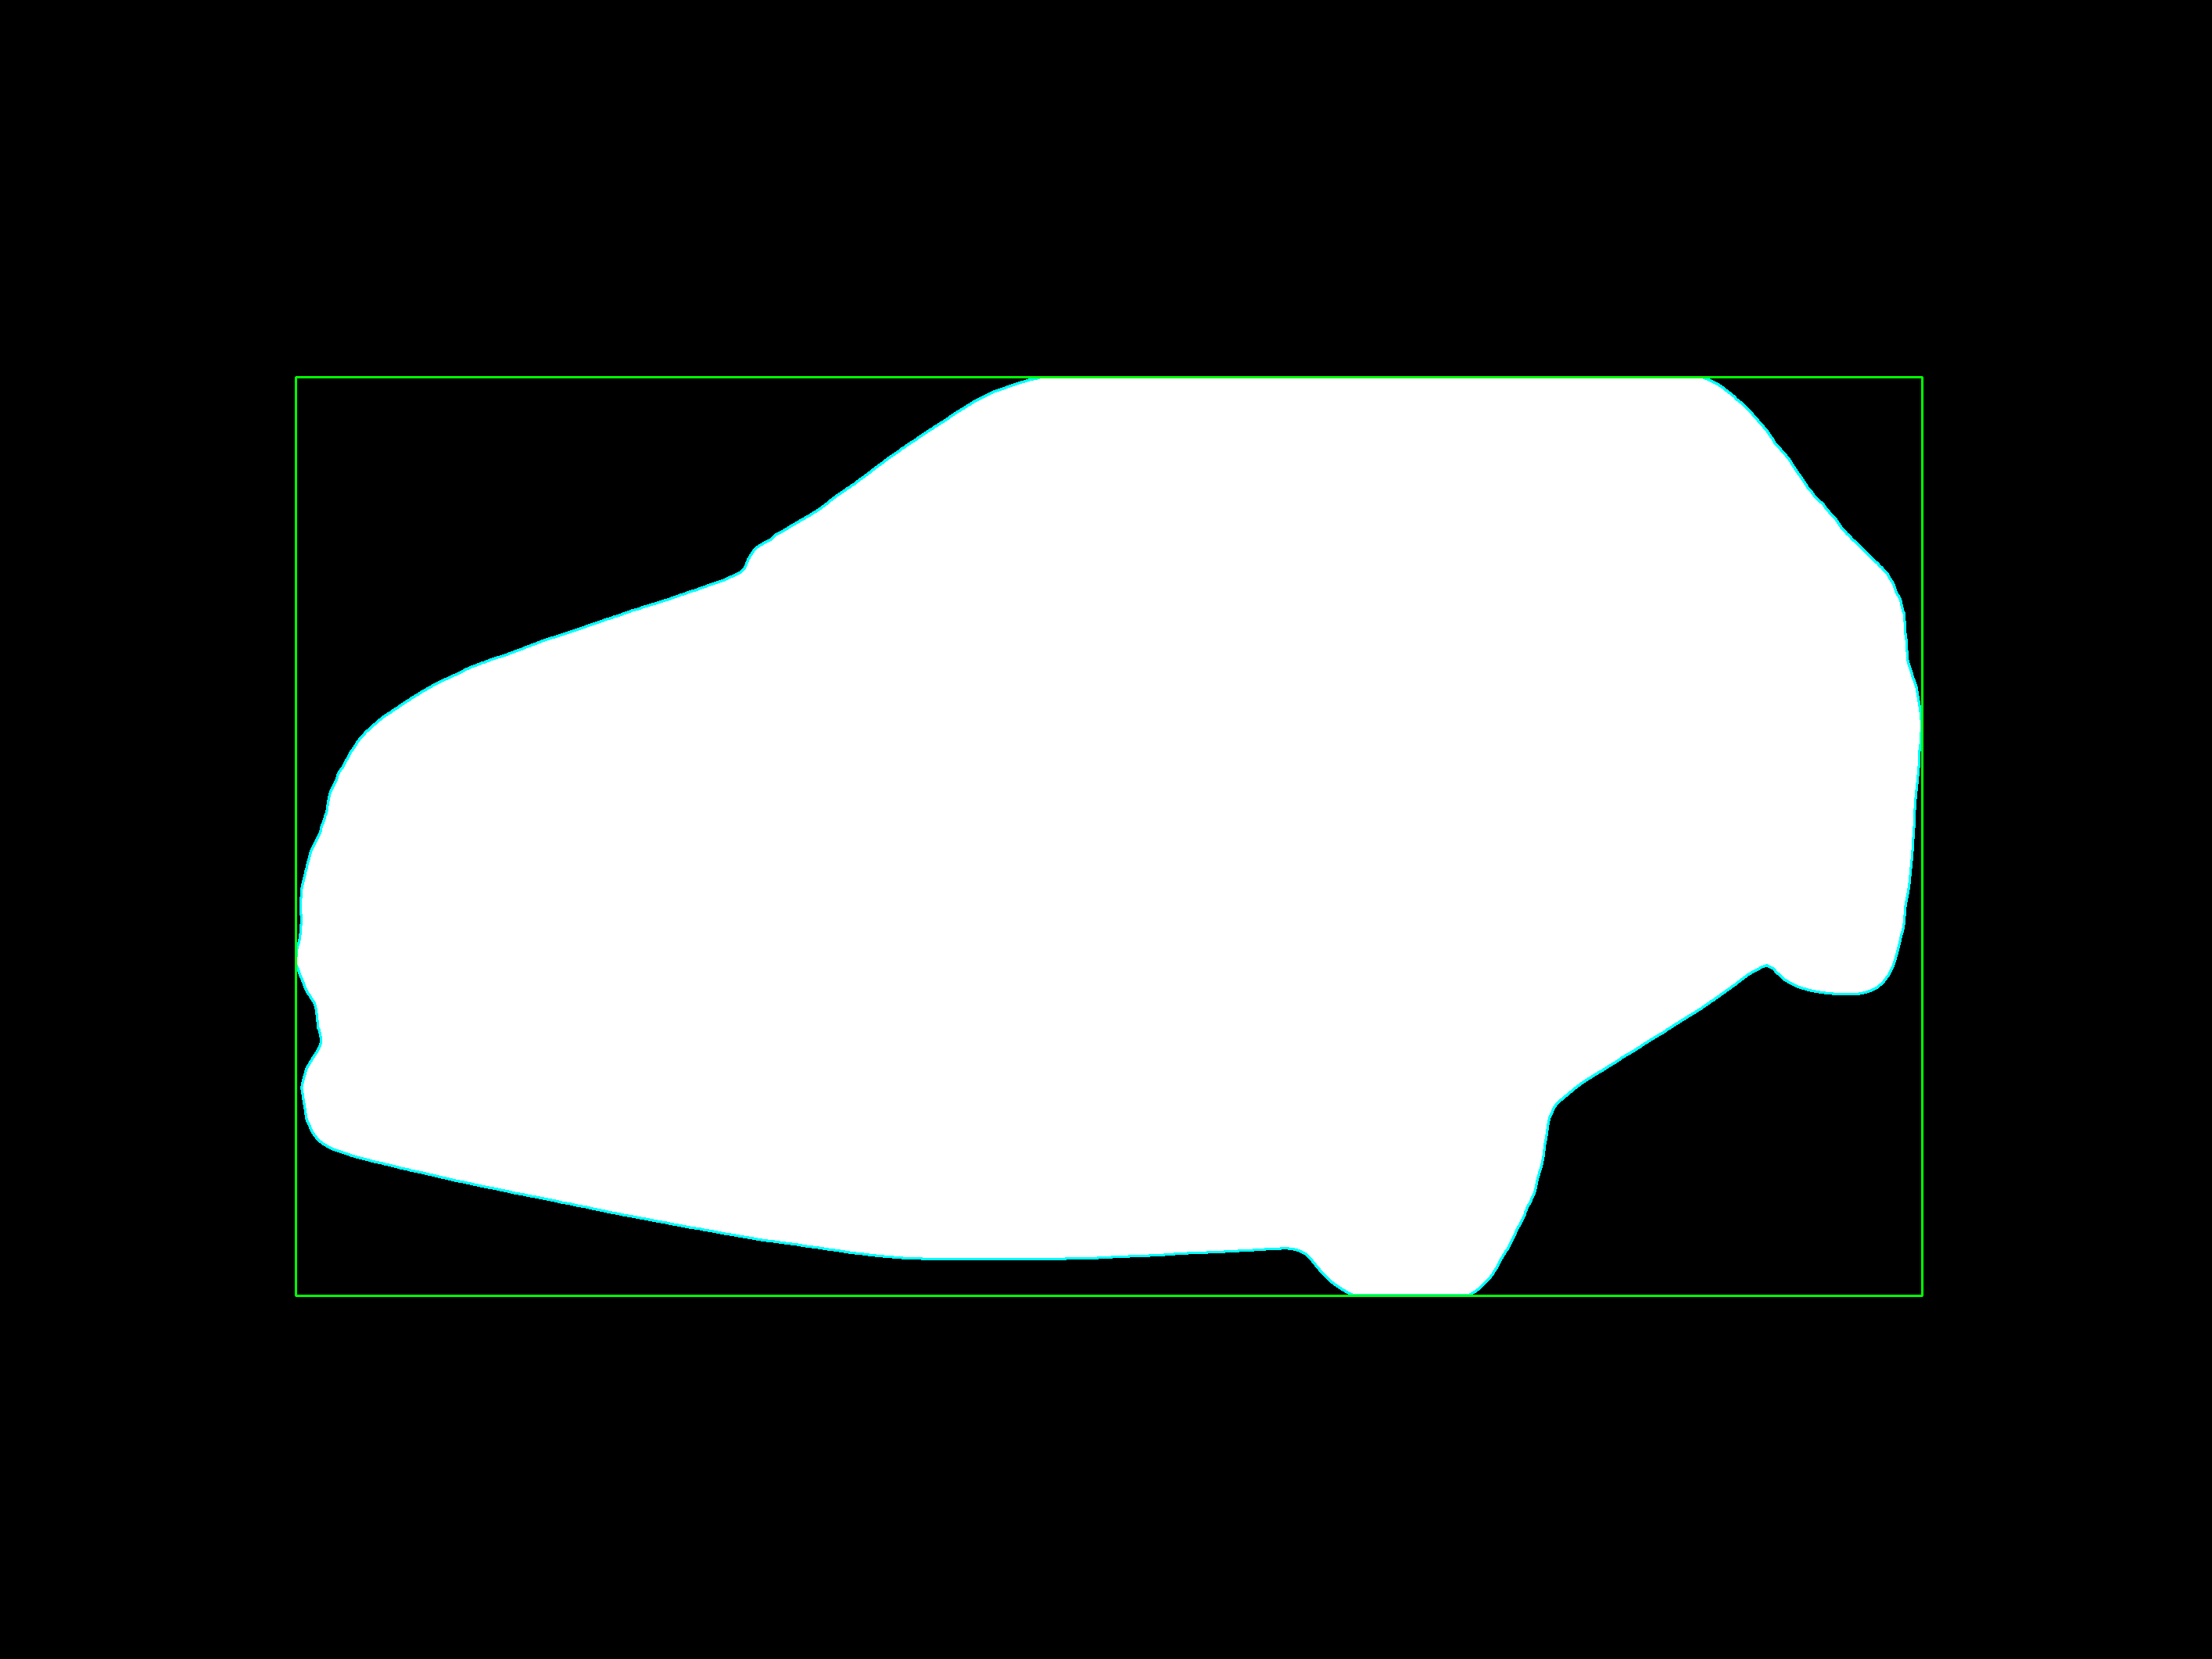

In [738]:
display(Image.fromarray(img))

In [739]:
import math

# visualisation
import matplotlib.pyplot as plt
import matplotlib.lines as lines
# visualisation

def Sum_points(P1, P2):
    x1, y1 = P1
    x2, y2 = P2
    return x1+x2, y1+y2

def Multiply_point(multiplier, P):
    x, y = P
    return float(x)*float(multiplier), float(y)*float(multiplier)

def Check_if_object_is_polygon(Cartesian_coords_list):
    if Cartesian_coords_list[0] == Cartesian_coords_list[len(Cartesian_coords_list)-1]:
        return True
    else:
        return False

class Object():

    def __init__(self, Cartesian_coords_list):
        self.Cartesian_coords_list = Cartesian_coords_list

    def Find_Q_point_position(self, P1, P2):
        Summand1 = Multiply_point(float(3)/float(4), P1)
        Summand2 = Multiply_point(float(1)/float(4), P2)
        Q = Sum_points(Summand1, Summand2) 
        return Q

    def Find_R_point_position(self, P1, P2):
        Summand1 = Multiply_point(float(1)/float(4), P1)
        Summand2 = Multiply_point(float(3)/float(4), P2)        
        R = Sum_points(Summand1, Summand2)
        return R

    def Smooth_by_Chaikin(self, number_of_refinements):
        refinement = 1
        copy_first_coord = Check_if_object_is_polygon(self.Cartesian_coords_list)
        while refinement <= number_of_refinements:
            self.New_cartesian_coords_list = []

            for num, tuple in enumerate(self.Cartesian_coords_list):
                if num+1 == len(self.Cartesian_coords_list):
                    pass
                else:
                    P1, P2 = (tuple, self.Cartesian_coords_list[num+1])
                    Q = obj.Find_Q_point_position(P1, P2)
                    R = obj.Find_R_point_position(P1, P2)
                    self.New_cartesian_coords_list.append(Q)
                    self.New_cartesian_coords_list.append(R)

            if copy_first_coord:
                self.New_cartesian_coords_list.append(self.New_cartesian_coords_list[0])

            self.Cartesian_coords_list = self.New_cartesian_coords_list
            refinement += 1
        return self.Cartesian_coords_list


In [740]:
# The extreme points
l_m = tuple(cnt[cnt[:, :, 0].argmin()][0])
r_m = tuple(cnt[cnt[:, :, 0].argmax()][0])
t_m = tuple(cnt[cnt[:, :, 1].argmin()][0])
b_m = tuple(cnt[cnt[:, :, 1].argmax()][0])
pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

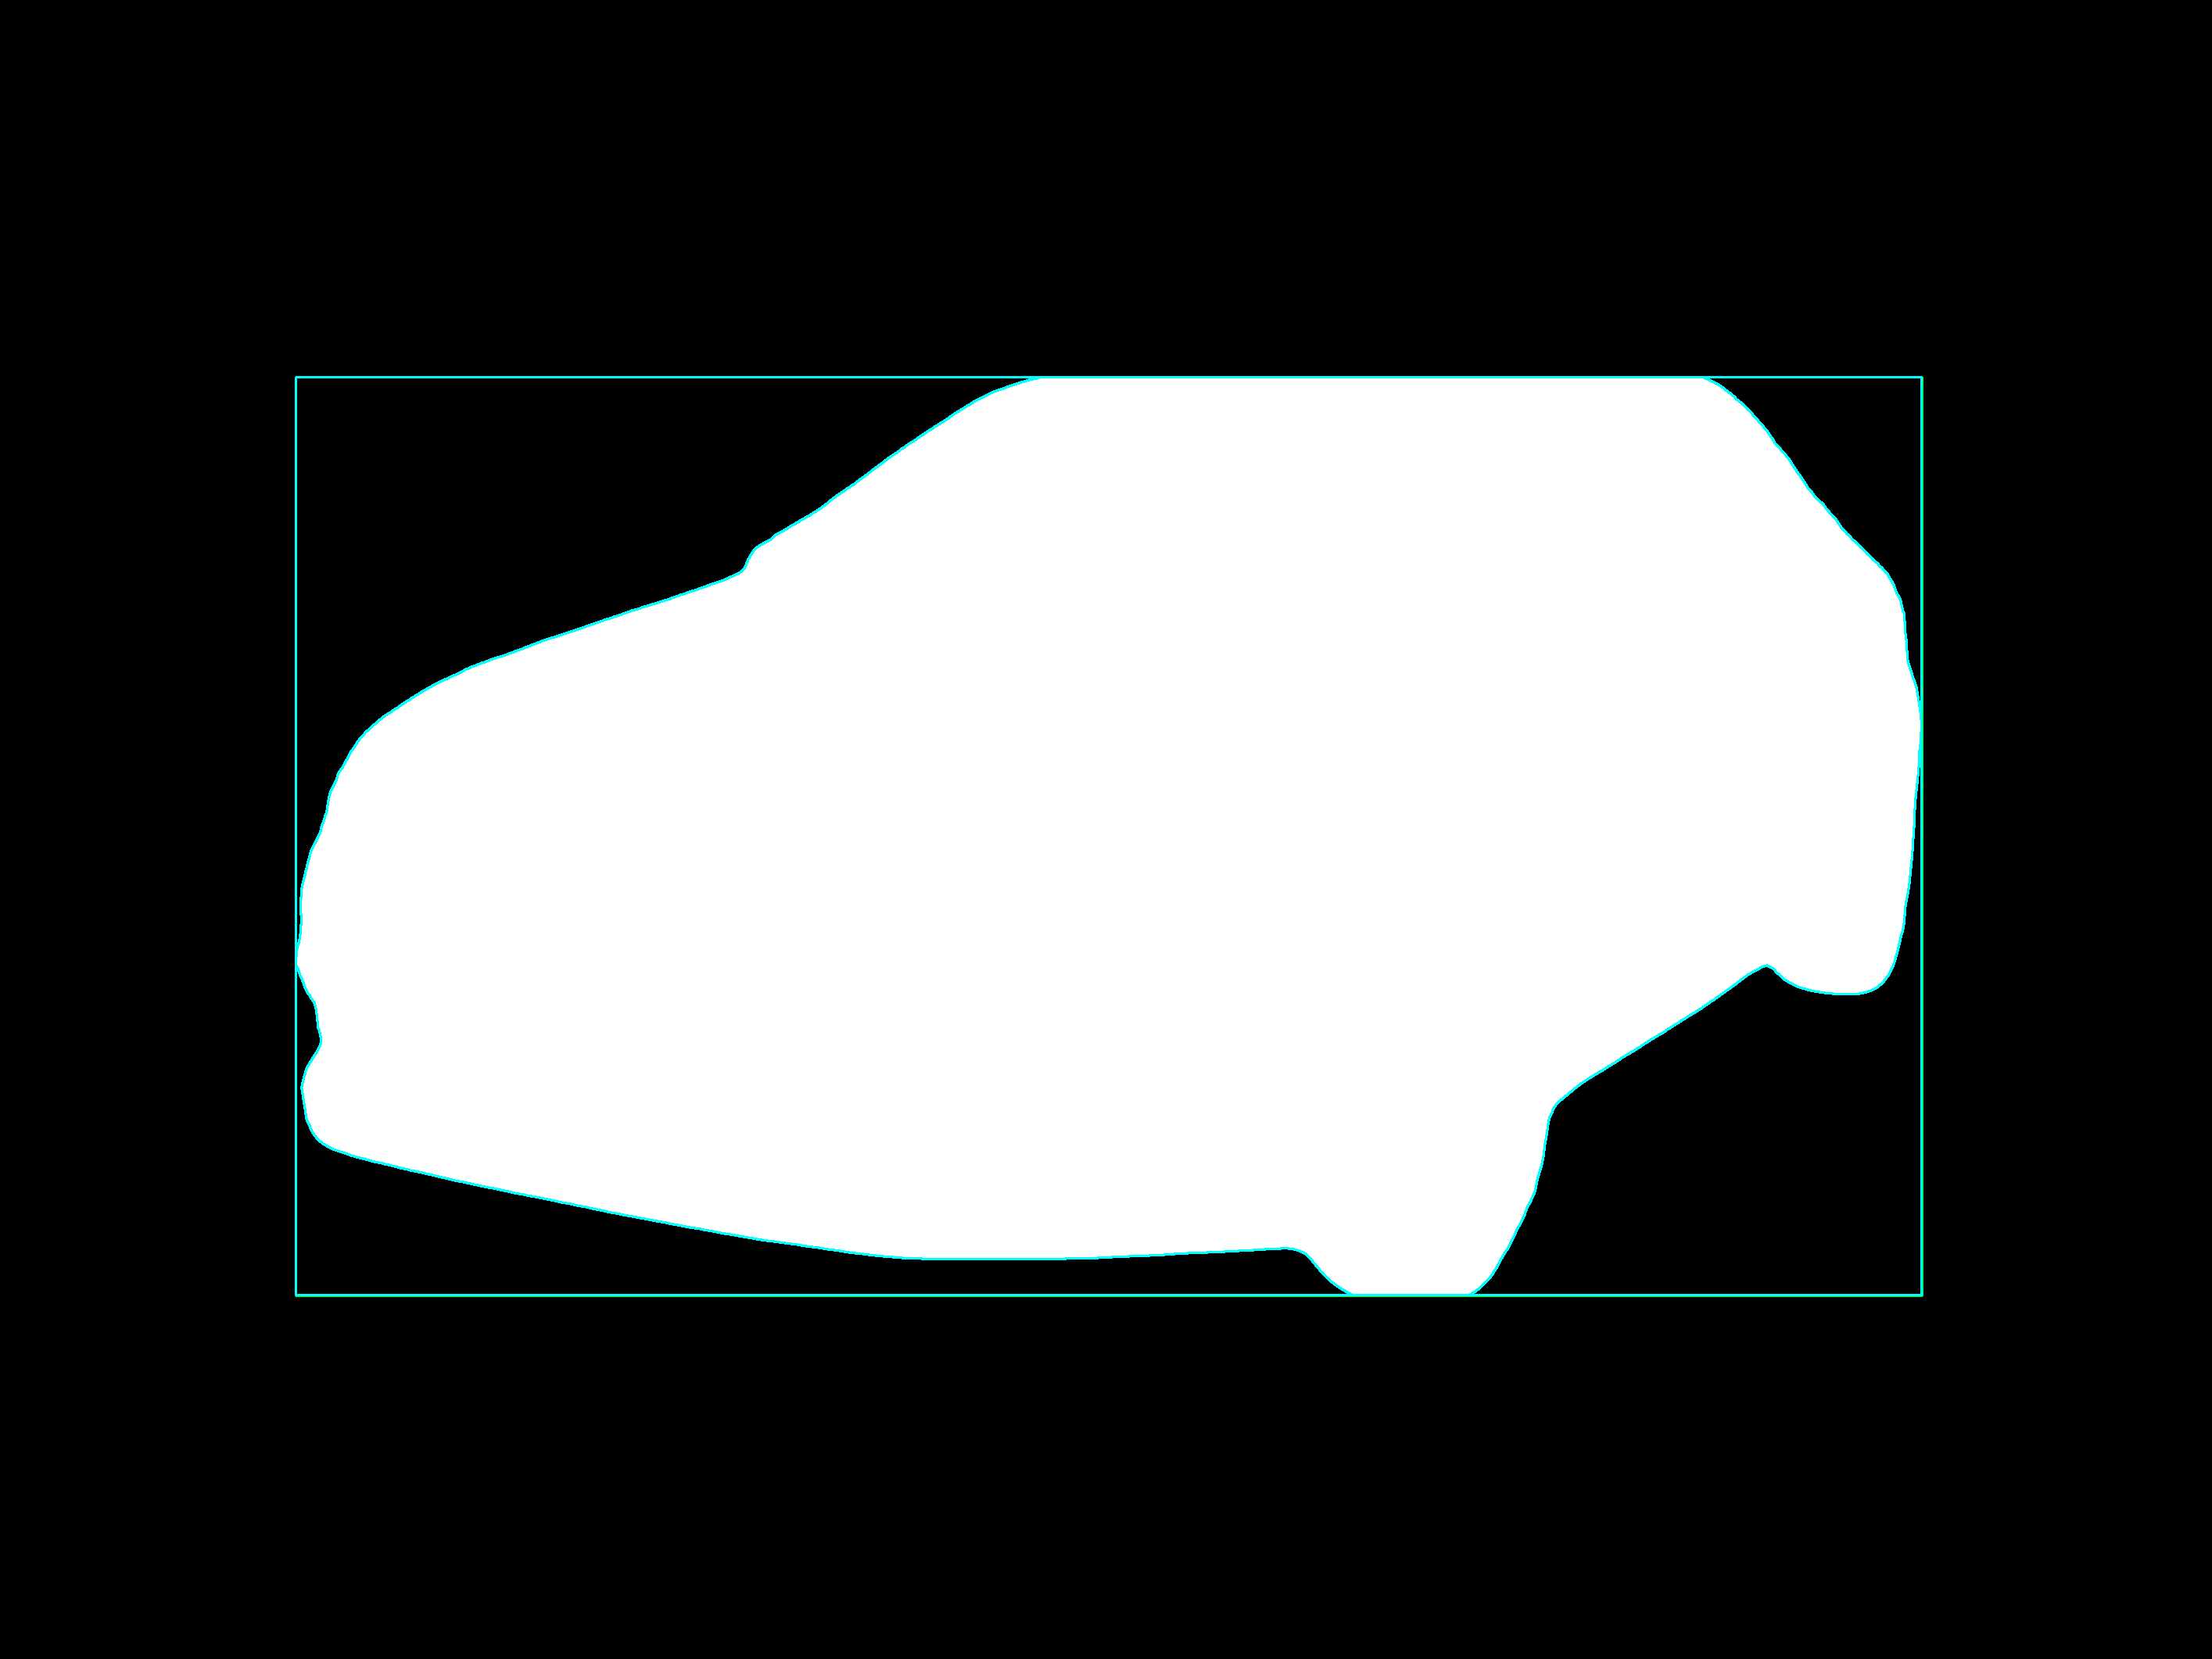

In [741]:
import numpy as np

# img_cp = cv2.imread('/home/ubuntu/Users/maixueqiao/image_processing/20220603-154916.png')

# compute rotated rectangle (minimum area)
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
box_pts = np.array(box)
# draw minimum area rectangle (rotated rectangle)
img_cp = cv2.drawContours(img,[box],0,(0,255,255),2)
display(Image.fromarray(img))

In [742]:
# min_tl, min_tr, min_br, min_bl = box_pts[0], box_pts[1], box_pts[2], box_pts[3]
# min_tr

# front right
min_bottomleft, min_topleft, min_bottomright, min_topright = box_pts[0], box_pts[1], box_pts[2], box_pts[3]
min_bottomleft, min_topleft, min_bottomright, min_topright


(array([378, 482]),
 array([2457,  482]),
 array([2457, 1656]),
 array([ 378, 1656]))

In [743]:
rec_tl, rec_bl, rec_tr, rec_br = bbox[0], bbox[1], bbox[2], bbox[3]

In [744]:
rec_tl, rec_bl, rec_tr, rec_br 

((378, 482), (378, 1657), (2458, 482), (2458, 1657))

In [745]:
if min_bottomleft[1] == min_topleft[1]:
    print("yes")

yes


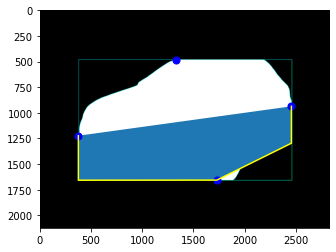

In [746]:
r_bound = rec_tr[0]
l_bound = rec_bl[1]

# The extreme points
l_m = tuple(cnt[cnt[:, :, 0].argmin()][0])
r_m = tuple(cnt[cnt[:, :, 0].argmax()][0])
t_m = tuple(cnt[cnt[:, :, 1].argmin()][0])
b_m = tuple(cnt[cnt[:, :, 1].argmax()][0])
pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

def get_mc(x1,x2,y1,y2):
    m = (y2-y1)/(x2-x1)
    c = y1-m*x1
    return m,c

def findx(m,y,c):
    x = (y-c)/m
    return x

def findy(m,x,c):
    y = m*x+c
    return y


def front_left(box_pts, bbox):
    min_bottomleft, min_topleft, min_bottomright, min_topright = box_pts[0], box_pts[1], box_pts[2], box_pts[3]
    rec_tl, rec_bl, rec_tr, rec_br = bbox[0], bbox[1], bbox[2], bbox[3]
    
    if min_bottomleft[1] == min_topleft[1] or min_bottomright[1] == min_topright[1]:
        poly = [l_m, rec_bl, b_m, tuple([r_m[0],(r_m[1]+b_m[1])/2]), r_m]
        obj = Object(poly)    
        Smoothed_obj = obj.Smooth_by_Chaikin(number_of_refinements = 0)

    else:
        # front left
        m1, c1 = get_mc(l_m[0],min_bottomleft[0],l_m[1],min_bottomleft[1])
        m2, c2 = get_mc(min_bottomright[0],min_bottomleft[0],min_bottomright[1],min_bottomleft[1])

        x = findx(m1, rec_bl[1], c1)
        y2 = findy(m2,rec_tr[0], c2)
        y0 = findy(m1,rec_tl[0],c1)

        poly = [l_m, tuple([x,rec_bl[1]]),b_m,tuple([r_m[0], (b_m[1]+r_m[1])/2]), r_m]
        obj = Object(poly)    
        Smoothed_obj = obj.Smooth_by_Chaikin(number_of_refinements = 2)

    x1 = [i for i,j in Smoothed_obj]
    y1 = [j for i,j in Smoothed_obj]
    return x1, y1

def rear_right(box_pts, bbox):
    min_bottomleft, min_topleft, min_bottomright, min_topright = box_pts[0], box_pts[1], box_pts[2], box_pts[3]
    rec_tl, rec_bl, rec_tr, rec_br = bbox[0], bbox[1], bbox[2], bbox[3]
    
    if min_bottomleft[1] == min_topleft[1] or min_bottomright[1] == min_topright[1]:
        poly = [l_m, rec_bl, b_m, tuple([r_m[0],(r_m[1]+b_m[1])/2]), r_m]
        obj = Object(poly)    
        Smoothed_obj = obj.Smooth_by_Chaikin(number_of_refinements = 0)

    else:
        # front left
        m1, c1 = get_mc(l_m[0],min_bottomleft[0],l_m[1],min_bottomleft[1])
        x = findx(m1, rec_bl[1], c1)
        poly = [l_m, tuple([x,rec_bl[1]]),b_m,tuple([r_m[0], (b_m[1]+r_m[1])/2]), r_m]
        obj = Object(poly)    
        Smoothed_obj = obj.Smooth_by_Chaikin(number_of_refinements = 2)

    x1 = [i for i,j in Smoothed_obj]
    y1 = [j for i,j in Smoothed_obj]
    return x1, y1

def front_right(box_pts, bbox):
    min_bottomleft, min_topleft, min_bottomright, min_topright = box_pts[0], box_pts[1], box_pts[2], box_pts[3]
    rec_tl, rec_bl, rec_tr, rec_br = bbox[0], bbox[1], bbox[2], bbox[3]
    
    if min_bottomleft[1] == min_topleft[1] or min_bottomright[1] == min_topright[1]:
        poly = [l_m, rec_bl, b_m, tuple([r_m[0],(r_m[1]+b_m[1])/2]), r_m]
        obj = Object(poly)    
        Smoothed_obj = obj.Smooth_by_Chaikin(number_of_refinements = 0)

    else:
        m3, c3 = get_mc(min_bottomleft[0], min_bottomright[0], min_bottomleft[1], min_bottomright[1])
        y3 = findy(m3, rec_bl[0], c3)
        poly = [l_m, tuple([rec_tl[0],y3]), b_m, (r_m[0],(r_m[1]+b_m[1])/2), r_m]
        obj = Object(poly)    
        Smoothed_obj = obj.Smooth_by_Chaikin(number_of_refinements = 0)


    x1 = [i for i,j in Smoothed_obj]
    y1 = [j for i,j in Smoothed_obj]
    return x1, y1

x1, y1 = front_left(box_pts, bbox)
myline = lines.Line2D(x1,y1,color='yellow')
plt.gca().add_artist(myline)
poly_pts = Polygon(poly)
smooth = Polygon(zip(x1,y1))
x, y = smooth.exterior.xy
plt.fill(x, y)

plt.imshow(img)
plt.scatter(xcor, ycor, c = 'b', s = 50)


In [747]:
l_slant_grad = (min_tl[1]-min_bl[1])/(min_tl[0]-min_bl[0])
c_slantleft = min_tl[1]-l_slant_grad*min_tl[0]
findx(l_slant_grad,rec_bl[1], c_slantleft)
print('slant left bottom intersect: ', findx(l_slant_grad,rec_bl[1], c_slantleft), rec_bl[1])

slant left bottom intersect:  7529.111111111111 1657


In [748]:
b_slant_grad = (min_br[1]-min_bl[1])/(min_br[0]-min_bl[0])
c_slantbot = min_br[1]-b_slant_grad*min_br[0]
bot_y = findy(b_slant_grad, rec_tr[0], c_slantbot)
print('slant left bottom intersect: ',rec_tr[0], bot_y)

slant left bottom intersect:  2458 -7456.60655737705


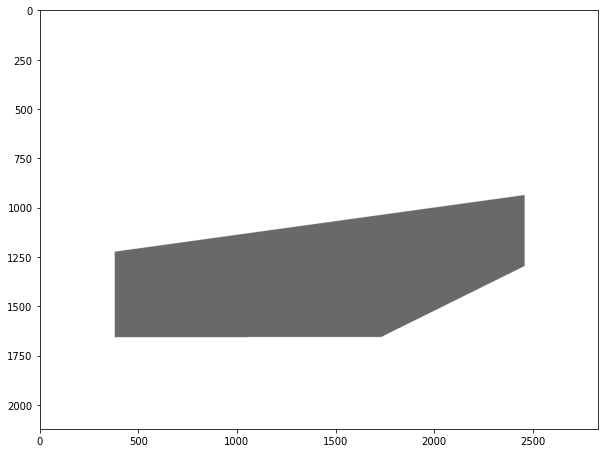

In [750]:
#half opacity#half opacity
from PIL import Image
from PIL import ImageDraw
foreground_pil = Image.open('/home/ubuntu/Users/maixueqiao/image_processing/{}_foreground.png'.format(im_path.split('_')[0])).convert('RGBA')

poly_ = Image.new('RGBA', foreground_pil.size)
pdraw = ImageDraw.Draw(poly_)
pdraw.polygon([(x1,y1) for x1,y1 in zip(x1,y1)],
              fill=(0,0,0,150),outline=(0,0,0,25))
plt.figure(figsize=(10,10))
plt.imshow(poly_)
plt.show()
poly_.save('poly_mask.png')

In [751]:
# import matplotlib.pyplot as plt
# from shapely.geometry import Polygon

# xs = [ 208, 1618 ]
# ys = [824, 590]

# # read the input image
# plt.imshow(img)
# plt.scatter(xcor, ycor, c = 'b', s = 50)
# plt.scatter(box[:, 0], box[:, 1], marker="x", color="red", s=200)
# plt.scatter(list(bboxx), list(bboxy), marker="x", color="red", s=200)
# plt.scatter(box[:, 0], box[:, 1], marker="x", color="yellow")
# plt.scatter(xs, ys, marker="o", color="orange")

# poly = [l_m, (bboxx[1], b_m[1]),b_m, (box[:, 0][2],box[:, 1][2]), r_m, l_m]
# obj = Object(poly)    
# Smoothed_obj = obj.Smooth_by_Chaikin(number_of_refinements = 2)
# x1 = [i for i,j in Smoothed_obj]
# y1 = [j for i,j in Smoothed_obj]
# myline = lines.Line2D(x1,y1,color='white')
# plt.gca().add_artist(myline)

# for i, j in zip(box[:, 0], box[:, 1]):
#     plt.text(i, j+-0.5, '({}, {})'.format(i, j), color="red")
    
# for i, j in zip(xcor, ycor):
#     plt.text(i, j+-0.5, '({}, {})'.format(i, j), color="b")

# poly_pts = Polygon(poly)
# x, y = poly_pts.exterior.xy
# plt.fill(x, y)

# plt.show()

In [752]:
mask_pil = Image.open('/home/ubuntu/Users/maixueqiao/image_processing/poly_mask.png').convert('RGBA')


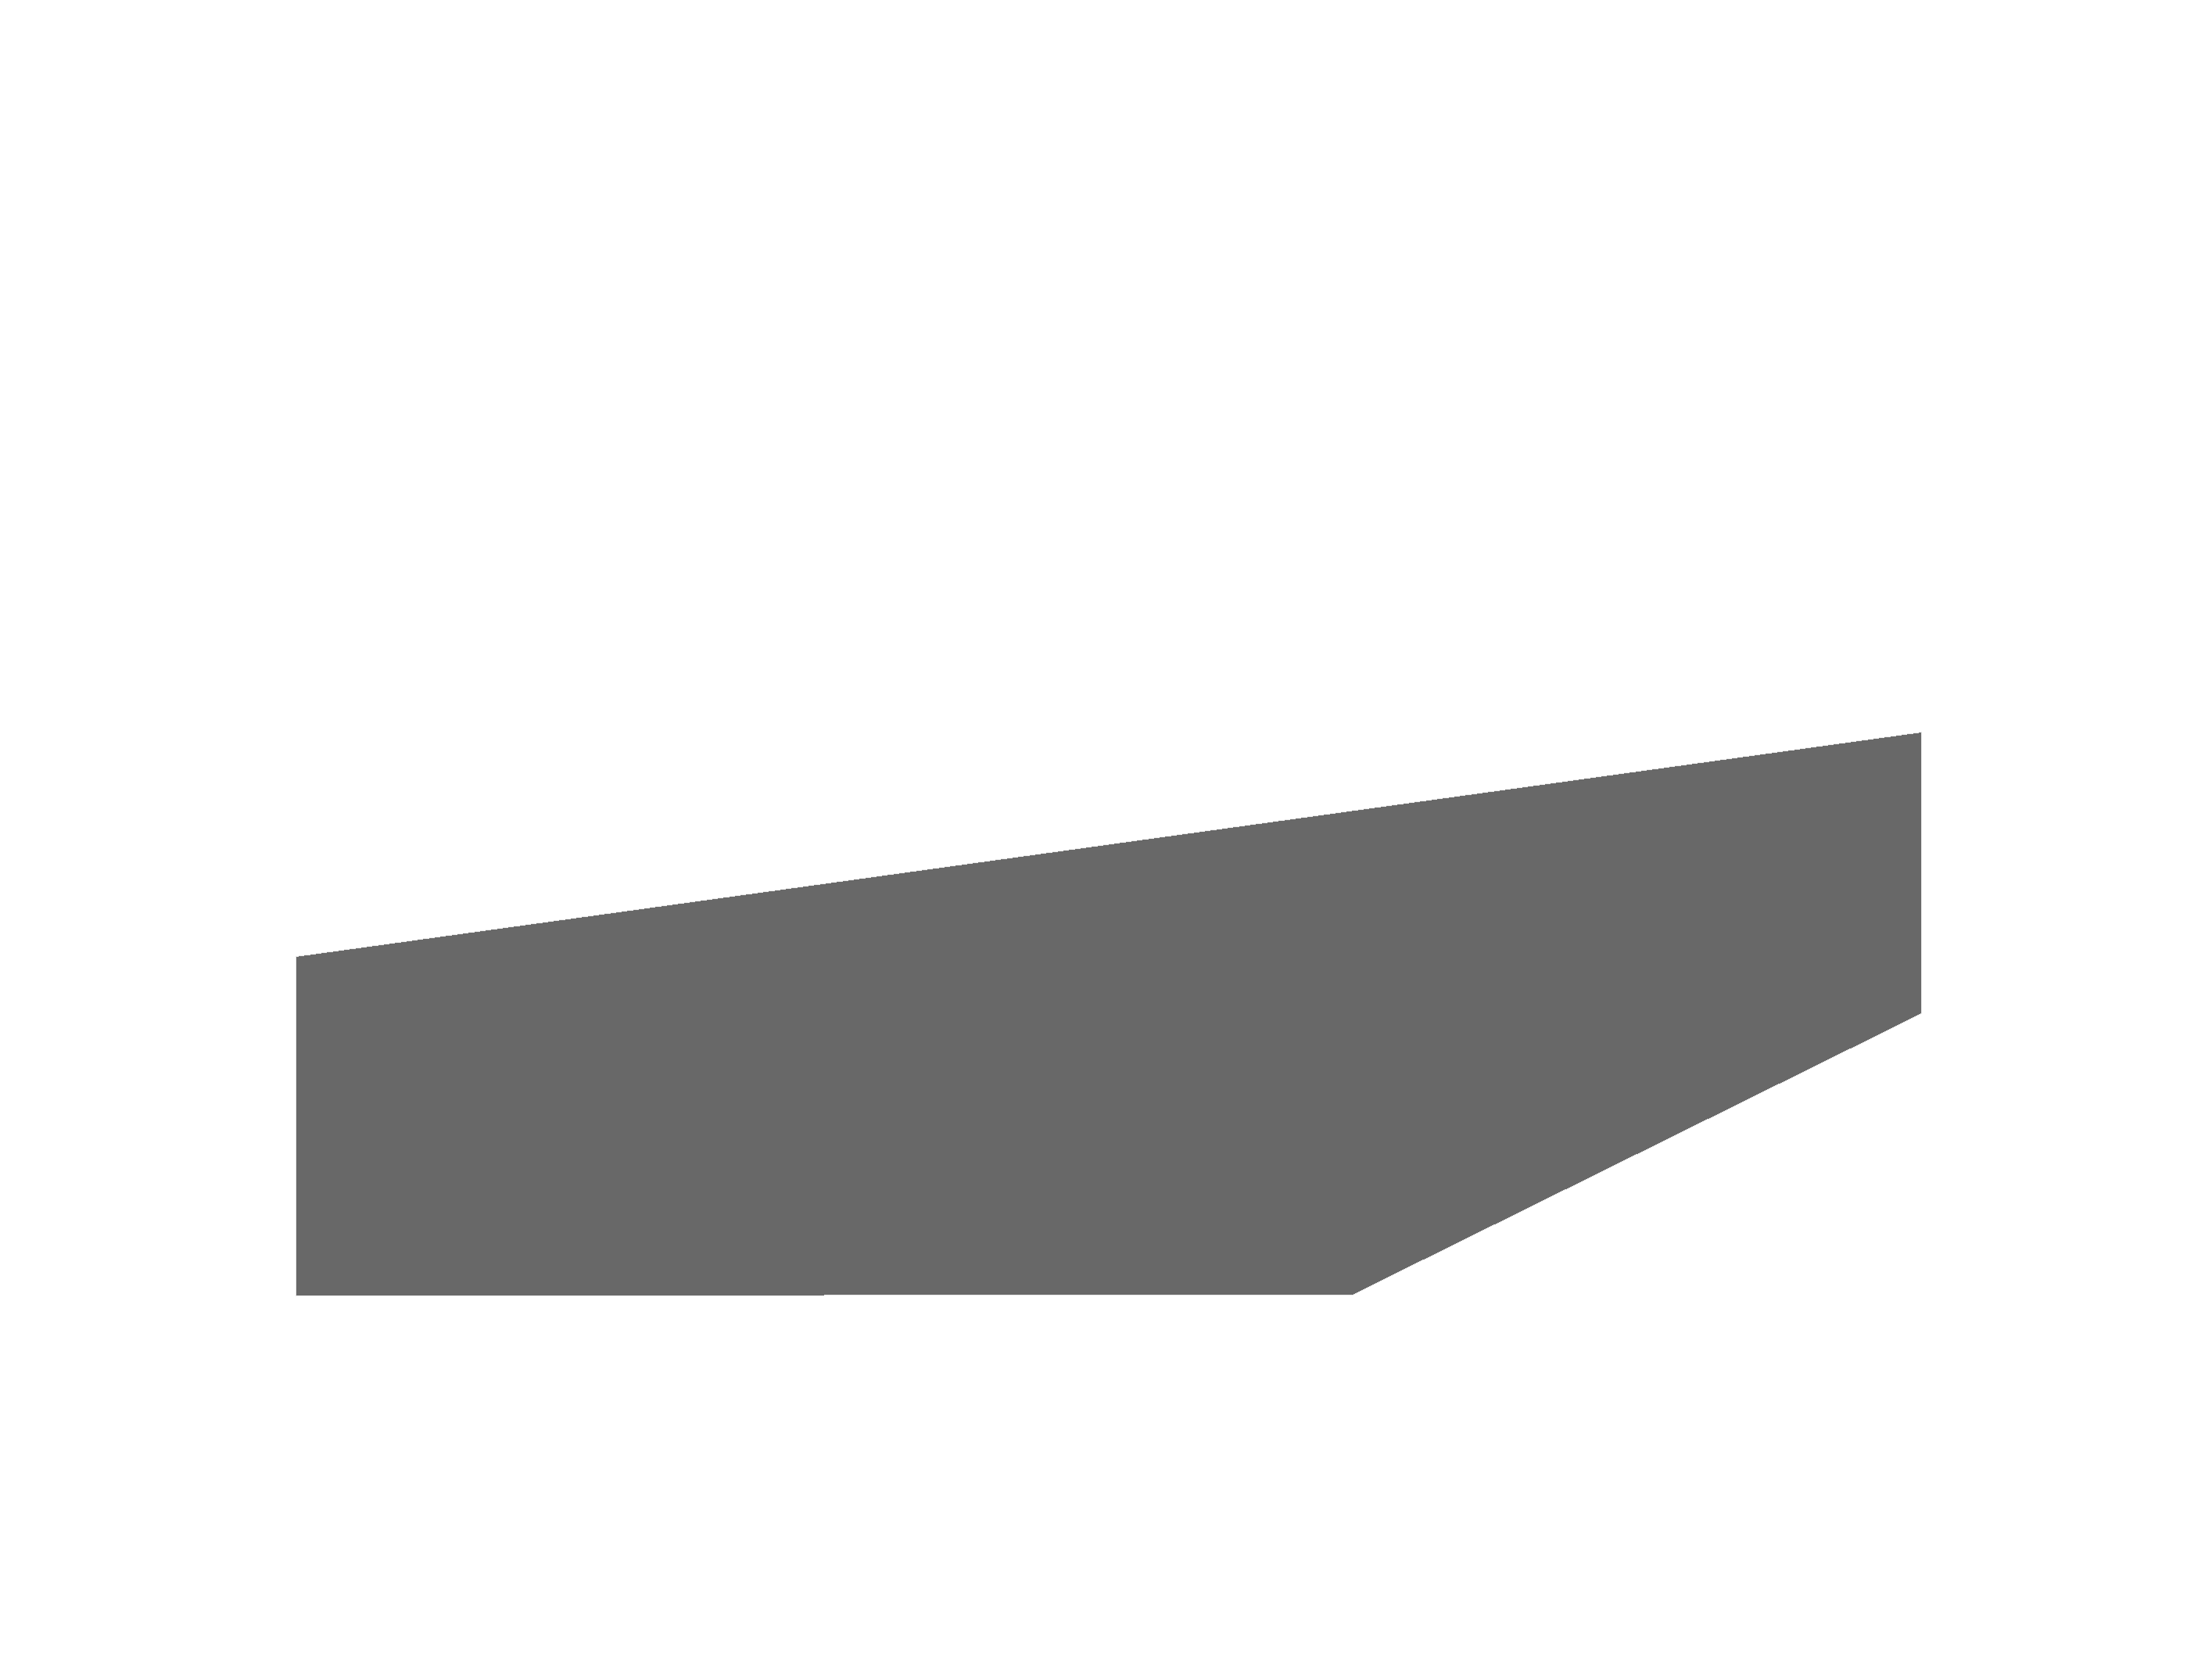

In [753]:
mask_pil


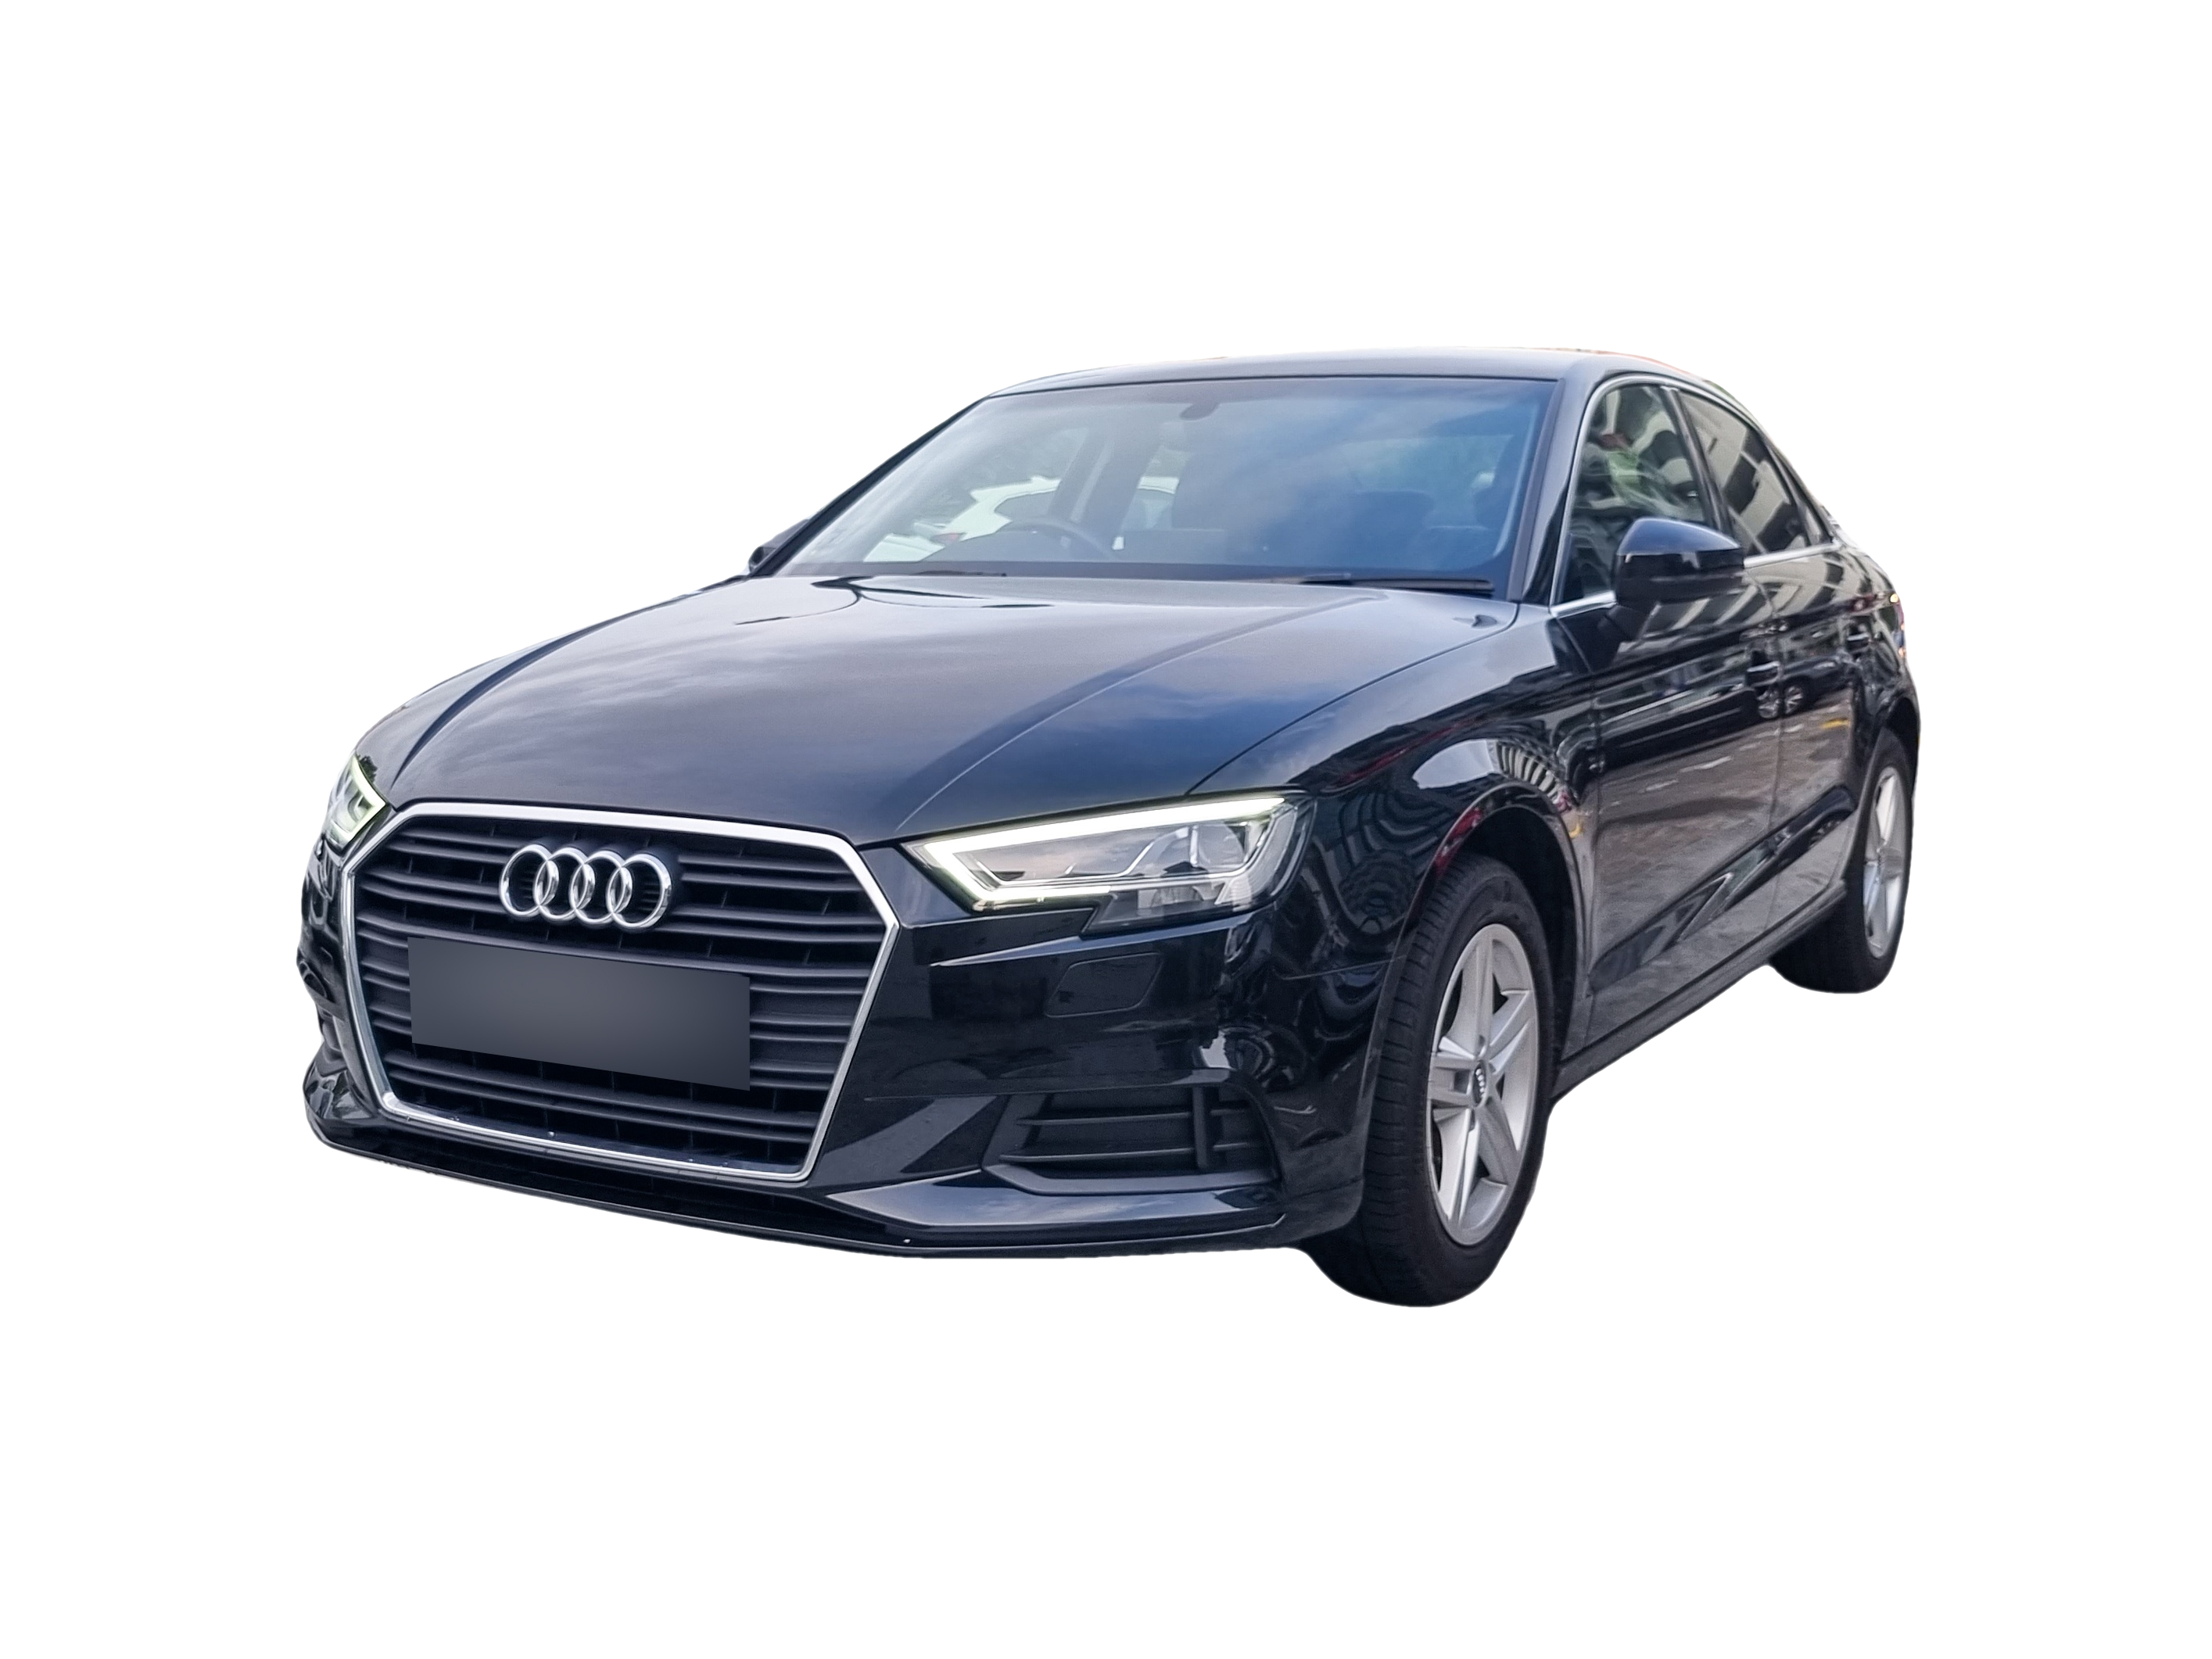

In [754]:
foreground_pil

In [755]:
from PIL import ImageFilter

# poly.resize(foreground_pil.size)
im_mask = mask_pil.filter(ImageFilter.GaussianBlur(30))
im_mask.paste(foreground_pil, (0,10),foreground_pil.convert('RGBA'))


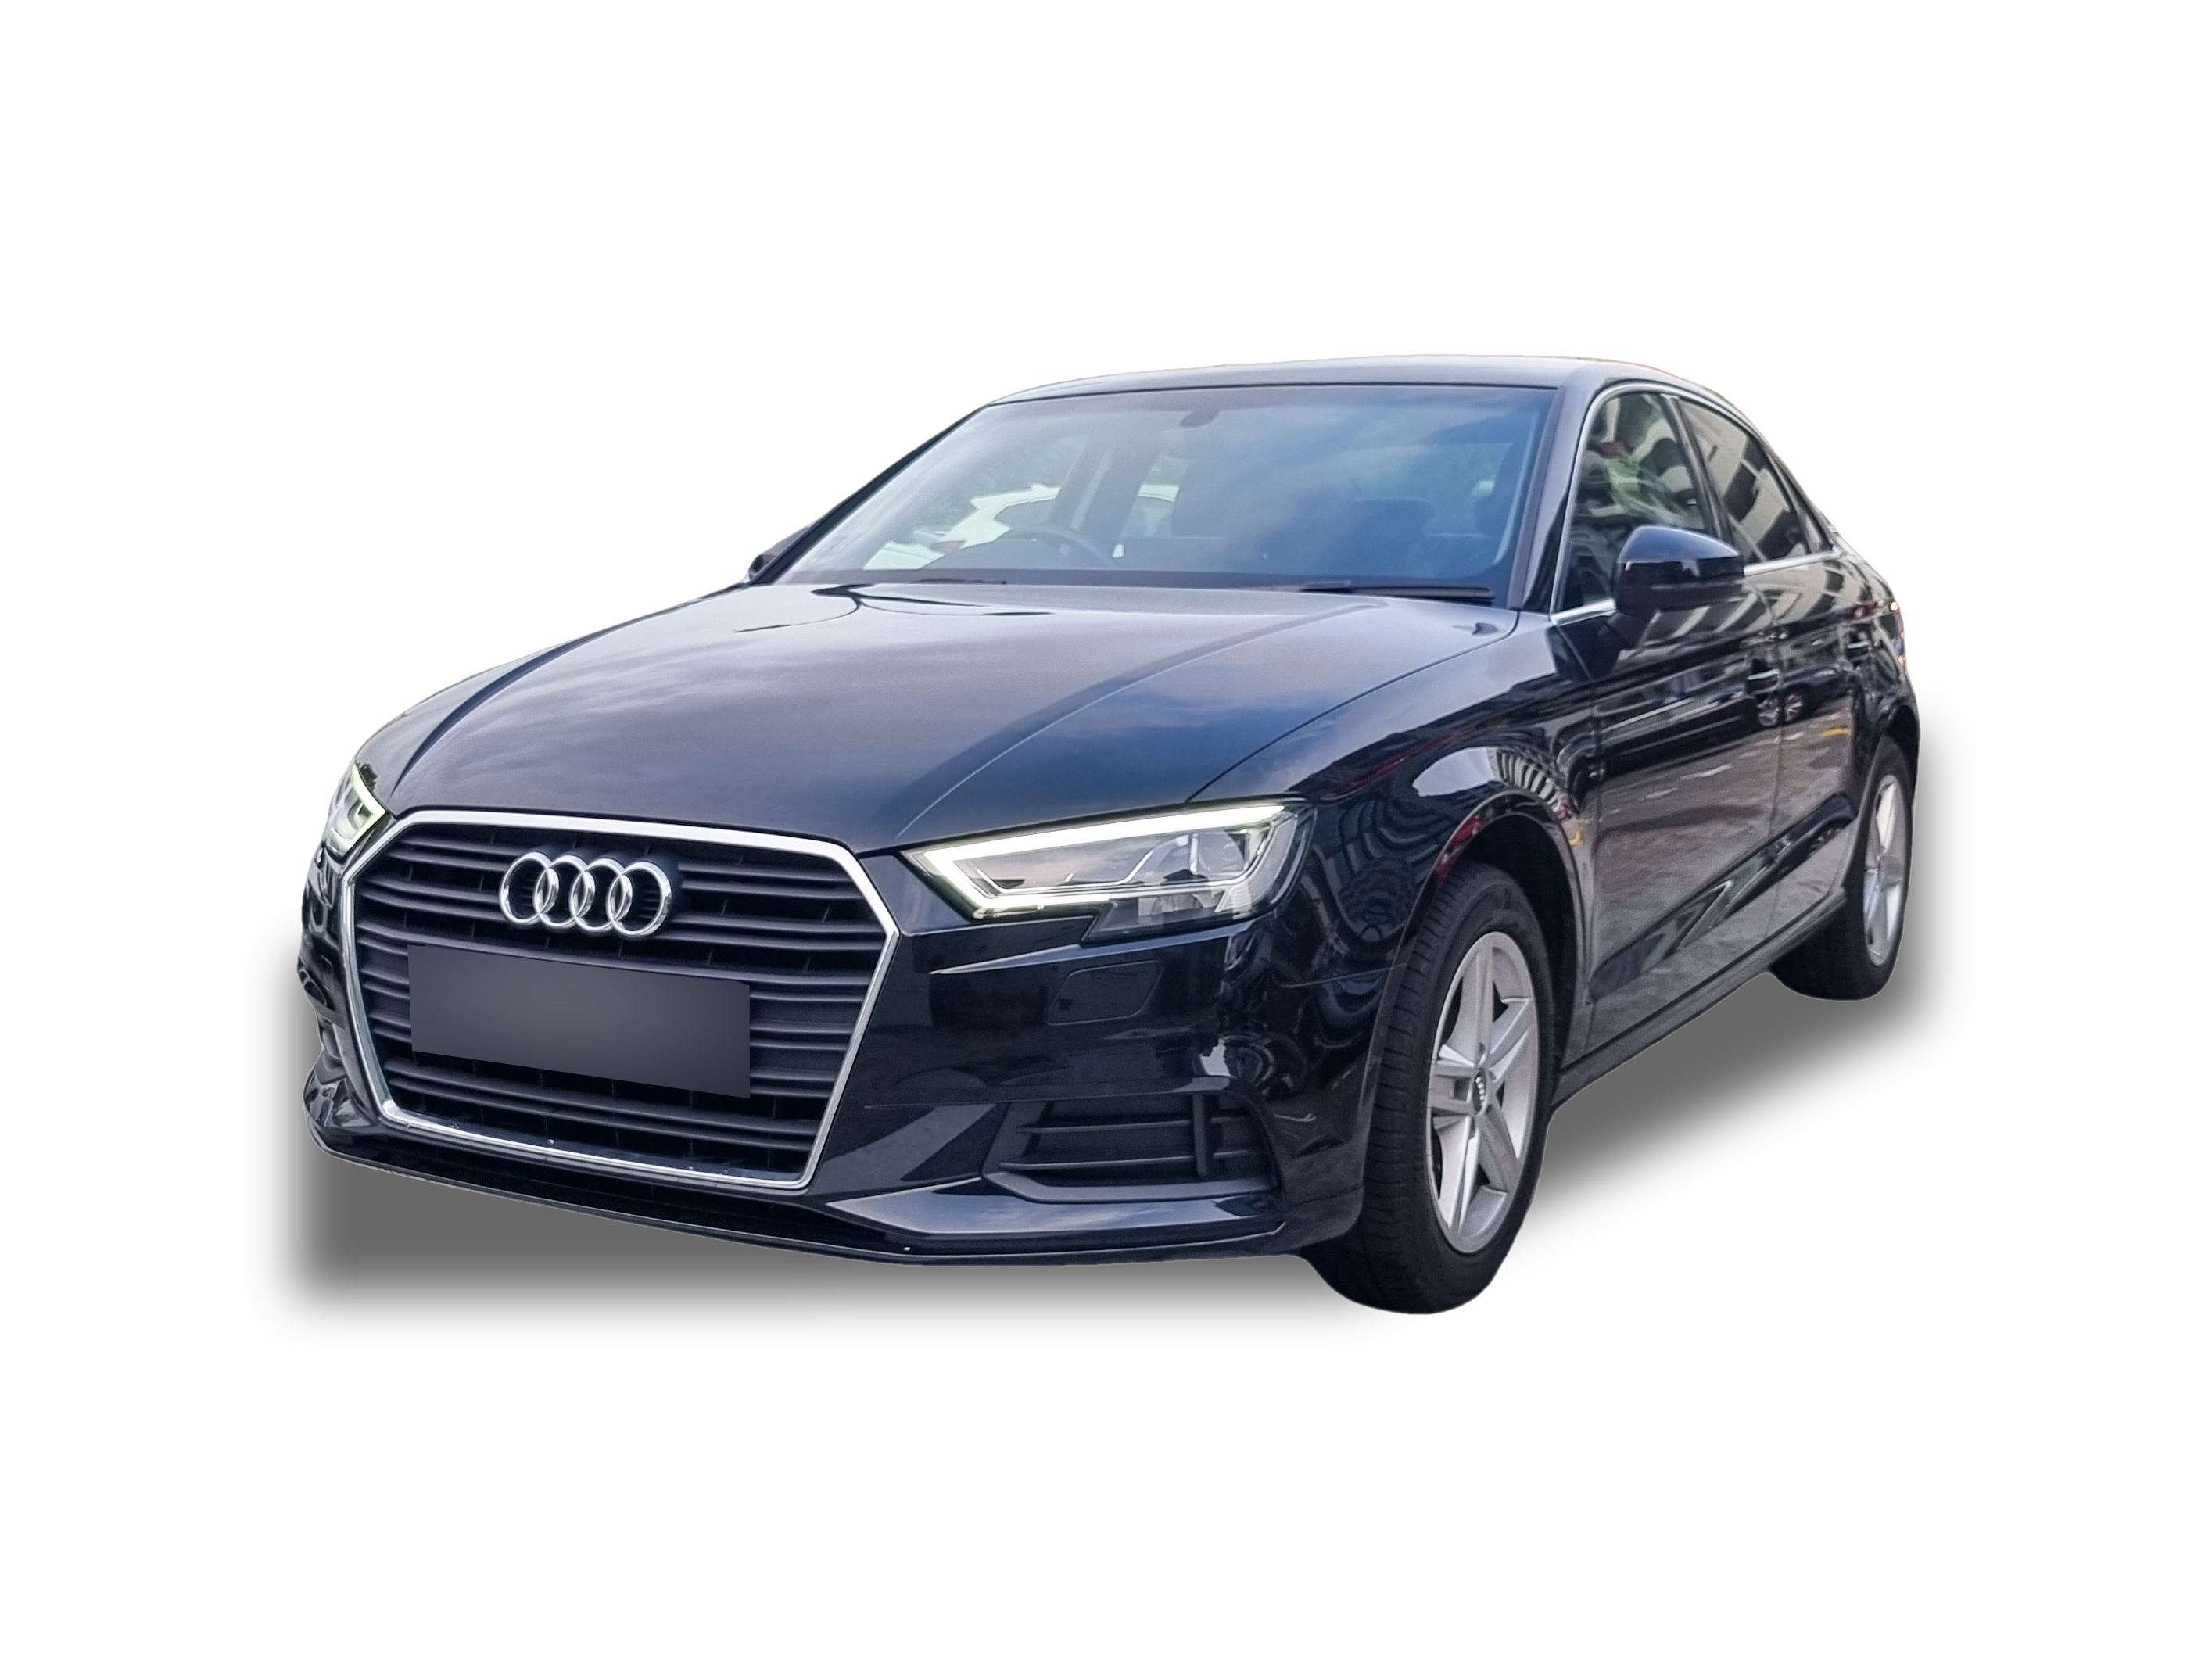

In [756]:
im_mask